In [1]:
import sympy
import numpy as np
from einsteinpy.symbolic import MetricTensor
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

#import inflatox
import inflatox

In [2]:
sympy.init_printing()
phi, theta = sympy.symbols("phi theta")
V0, φ0, a, m = sympy.symbols("V0 phi0 alpha m")
coords = [phi, theta]
d = len(coords)

metric = [[0 for i in range(2)] for i in range(2)]
metric[0][0] = 1
metric[1][1] = phi**2
metric = MetricTensor(metric, coords)
V = (V0 - a*theta + 1/2*(m**2)*((phi-φ0)**2)).nsimplify()
display(metric.tensor())
display(V)

⎡1  0 ⎤
⎢     ⎥
⎢    2⎥
⎣0  φ ⎦

In [3]:
hesse = inflatox.SymbolicCalculation.new(
  coords,
  metric,
  V,
).execute([[0,1]])

Calculating orthonormal basis...


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculating covariant Hesse matrix...


<IPython.core.display.Math object>

Projecting the Hesse matrix on the vielbein basis...


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
out = inflatox.Compiler(hesse).compile()
out.print_sym_lookup_table()

[Symbol Dictionary]
phi -> x[0]
theta -> x[1]
V0 -> args[0]
alpha -> args[1]
m -> args[2]
phi0 -> args[3]


In [5]:
from inflatox.consistency_conditions import AnguelovaLazaroiuCondition
anguelova = AnguelovaLazaroiuCondition(out)

args = np.array([3.4e-10, 5e-16, 2.5e-3, 0])
args = np.array([1.0, 1.0, 1.0, 1.0])
x = np.array([2.0, 2.0])
print(anguelova.calc_V(x, args))
print(anguelova.calc_H(x, args))

-0.5
[[0.45121951 0.18902439]
 [0.18902439 1.04878049]]


In [6]:
extent = (-2.0, 2.0, -2.0, 2.0)
array = anguelova.evaluate(args, *extent)

In [7]:
print(np.nanmin(array))
print(np.nanmax(array))

-129005309.86055237
494250033030.17804


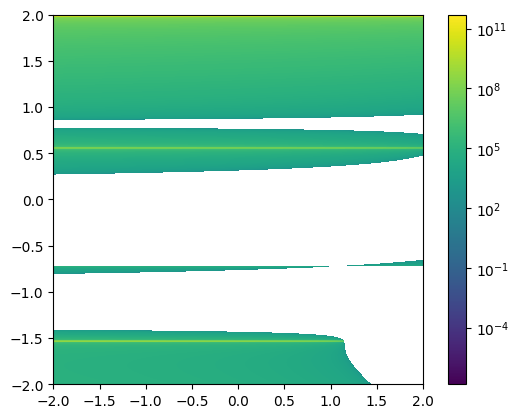

In [8]:
plt.imshow(array, norm=LogNorm(), extent=extent, aspect='equal')
plt.colorbar()

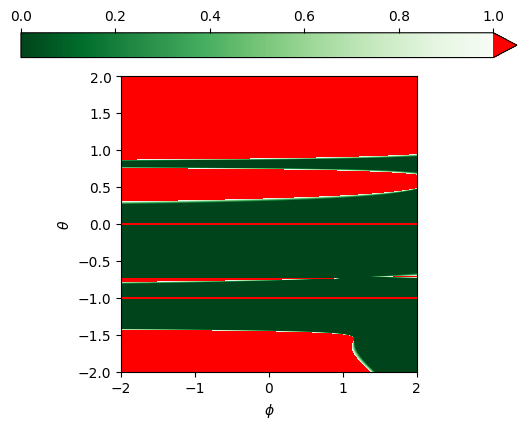

In [9]:
import matplotlib as mpl

cmap = mpl.colormaps['Greens'].copy().reversed()
cmap.set_over('red')
cmap.set_bad('red')

plt.imshow(
  array,
  extent=extent,
  cmap=cmap,
  norm=plt.Normalize(vmin=0.0, vmax=1.0),
  aspect='equal'
)
plt.colorbar(extend='max', location='top')

plt.xlabel(f'${sympy.latex(coords[0])}$')
plt.ylabel(f'${sympy.latex(coords[1])}$')
plt.show()

# Ideeën
- Björkmo zegt:
> In this model, the rapid-turn regime appears at $\rho \gg \rho_0$, where the
gradient of the potential is dominated by the $\rho$-direction, but where the
$\theta$-term nevertheless plays an important role.
Bestaat dit regime wel? Ter herinnering, de ongeprojecteerde Hesse matrix heeft
11 comp $m^2$ (dus constant)

- waarom zoveel `NaN`?